In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd

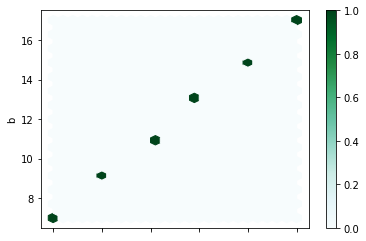

In [2]:
a=np.array([1,2,3,4,5,6])
b=np.array([7,8,9,10,11,12])
#df=pd.DataFrame([ (a[i],b[i]) for i in range(0 , len(a))],columns=['a','b'])
df=pd.DataFrame( list(zip(a,b)),columns=['a','b'])
df['b']=df['b']+np.arange(6)
df.plot(kind='hexbin',x='a',y='b',gridsize=25)

In [3]:
np.save("my data1",[1,2,3,4,3])

In [4]:
print(np.load("persistence.npy"))

[0.0024164  0.03490206 0.06686238 ... 1.62935438 2.18973673 0.38369636]


[3.3863348]
[       inf 0.41686632 0.78693619 ...        inf        inf        inf]


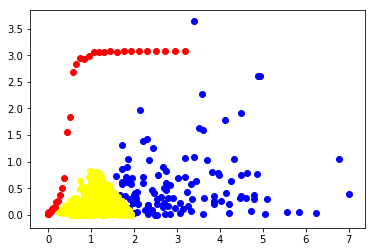

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
a=np.load("relative r6.npy")
b=np.array(np.load("persistence6.npy"))  
c=np.load("relative rc.npy")
d=np.load("max size.npy")
print(a[b==np.max(b)])
print(np.load("persist.npy"))
#plt.scatter(d,c)
#df=pd.DataFrame( {'f(r)':np.load("persist.npy"),'persistence':np.load("persistence5.npy")})


plt.scatter(np.load("relative r6.npy"),np.load("persistence6.npy"),color="blue")
plt.scatter(np.load("relative r43.npy"),np.load("persistence43.npy"),color="yellow")
plt.scatter(np.load("relative rc3.npy"),np.load("max size3.npy"),color="red")

#ax=df.plot.hexbin(x='f(r)',y='persistence',gridsize=25)
plt.show()


In [8]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from math import *
import dionysus as sus
#distance condition
def distcond(p1,p2,r):
    d=np.sqrt(np.sum((p1-p2)**2))
    if d<=2*r :
        return True
    else:
        return False
#point generations
def pg(n,d):
    return np.random.random((n,d))
#index list
def il(n):
    l=[]
    for i in range(0,n):
        l.append (i)
    return np.array(l)    
#root and cluster finding
def rc(p,il,n):
    
    for i in range (0,n):
        for j in range(1,n):
            if il[i]==il[j]:continue
            elif distcond(p[i],p[j],r) : il[il==max(il[i],il[j])]=min(il[i],il[j])
    cluster={} 
    j=0
    lenth=[]
    for i in range (0,n) :
        if i in il:
            
            cluster[j]= p[il==i]
            lenth.append(len(p[il==i]))
            j=j+1
    # finding each cluster ,cluster with maximum size, cluster max        
    return cluster , np.max(lenth) , cluster[lenth.index( np.max(lenth))]
# persistence distribution
def pd(p,d,mr,n):
        f=sus.fill_rips(p,d,mr)
        m=sus.homology_persistence(f)
        dgms = sus.init_diagrams(m, f)
        I=[]
        persist=[]
        rc=[]
        for i, dgm in enumerate(dgms):
    
               for pt in dgm:
            
                      I.append(i)
                      persist.append(n*pi*((pt.death)**2-(pt.birth)**2))
                      rc.append((pt.birth)**2*n*pi)
        pa=[]
        ra=[]
        for i in range (0, len(persist)):
             if persist[i]!= inf and I[i]==1:
                    pa.append(persist[i])
                    ra.append(rc[i])
        return ra , pa       
rtt=[]
mt=[]
for i in range (0,20):
    rt=[]
    m=[]
    for j in range (0,1):
   
            n=1000
            d=2
    
            r=.001*i
            p=pg(n,d)
            cl=rc(p,il(n),n)
            rt.append(r**2*n*pi)
            m.append(cl[1]/50)
     
    mt.append(np.average(np.array(m)))
    rtt.append(np.average(np.array(rt)))
    

plt.scatter(rtt,mt)   

plt.show()    

KeyboardInterrupt: 